In [41]:
import pandas as pd
import numpy as np

In [42]:
df_path = pd.read_csv('train.csv')
df_path

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [43]:
import pandas as pd

# 정확한 파일 경로 지정
file_path = "train.csv"

try:
    df = pd.read_csv(file_path)
    print("✅ CSV 파일 로드 성공!")
    print(df.head())  # 데이터 확인
except FileNotFoundError:
    print("🚨 오류: 파일을 찾을 수 없습니다. 다시 업로드해주세요!")
except pd.errors.ParserError:
    print("🚨 오류: CSV 파일의 형식이 올바르지 않습니다. (구분자 문제 가능성)")


✅ CSV 파일 로드 성공!
                             key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2            

In [44]:
def haversine(lat1, lon1, lat2, lon2):
    R = 3958.8  # 지구 반지름 (마일)
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

df['distance_miles'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                                 df['dropoff_latitude'], df['dropoff_longitude'])

X_clean = df[["distance_miles"]]
y_clean = df["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
                                 
df[["pickup_datetime", "distance_miles", "fare_amount"]].head()

,pickup_datetime,distance_miles,fare_amount
0,2009-06-15 17:26:21 UTC,0.640494,4.5
1,2010-01-05 16:52:16 UTC,5.250728,16.9
2,2011-08-18 00:35:00 UTC,0.863421,5.7
3,2012-04-21 04:30:42 UTC,1.739405,7.7
4,2010-03-09 07:51:00 UTC,1.242232,5.3


In [45]:
df_clean = df[(df['fare_amount'] > 2) & (df['fare_amount'] <= 100)]
df_clean = df_clean[(df_clean['distance_miles'] > 0) & (df_clean['distance_miles'] <= 30)]

df_clean.shape

(48410, 9)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df[["distance_miles"]]
y = df["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

model.coef_, model.intercept_, r2, rmse


(array([0.00076278]),
 11.368063592182699,
 -3.6874298074973666e-05,
 9.64232040926014)

In [47]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
ols_model = sm.OLS(y_train, X_train_sm).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     12.04
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           0.000522
Time:                        17:06:30   Log-Likelihood:            -1.4762e+05
No. Observations:               40000   AIC:                         2.952e+05
Df Residuals:                   39998   BIC:                         2.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.3681      0.049    234.198      0.000      11.273      11.463
distance_miles     0.0008      0.000      3.470      0.001       0.000       0.001
==============================================================================
Omnibus:                    31098.623   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           895068.625
Skew:                           3.537   Prob(JB):                         0.00
Kurtosis:                      25.068   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

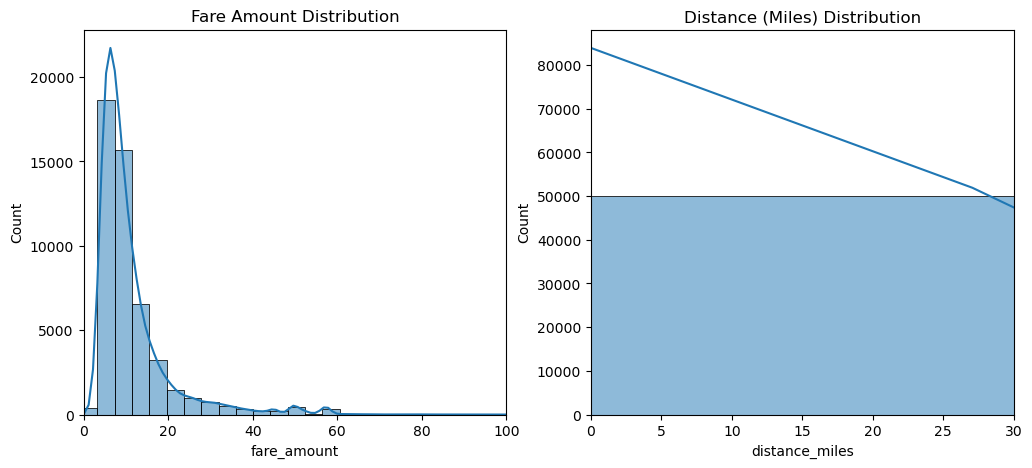

In [48]:
import seaborn as sns
import matplotlib.pyplot as pit

fig, axes = pit.subplots(1, 2, figsize=(12, 5))

sns.histplot(df["fare_amount"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Fare Amount Distribution")
axes[0].set_xlim(0, 100)

sns.histplot(df["distance_miles"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distance (Miles) Distribution")
axes[1].set_xlim(0, 30)

pit.show()

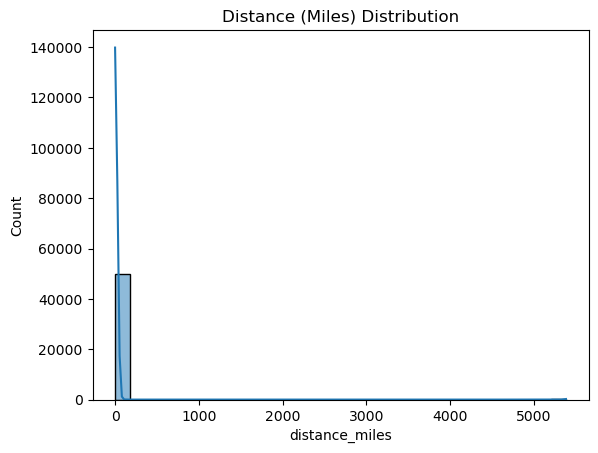

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['distance_miles'], bins=30, kde=True)
plt.title("Distance (Miles) Distribution")
plt.xlabel("distance_miles")
plt.ylabel("Count")
plt.show()